## GİRİŞ KAVRAMLARI - VERİ İLE TANIŞMA

$All$ $models$ $are$ $wrong,$ $but$ $some$ $are$ $useful$ -$George$ $Box$

***

Makine Öğrenmesi aslı itibariyle `veriyi anlama ve anlamlandırma` çabasıdır. Bu çabanın çıktısına  **Öğrenme (Learning)** adı verilir. Öğrenme eylemi, bilgisayarlar için iki temel kategoride gözlemlenebilir:
* Supervised Learning (Gözetimli Öğrenme)
* Unsupervised Learning (Gözetimsiz Öğrenme)

***
**Supervised Learning(Denetimli/Gözetimli Öğrenme):** Bir özelliği(feature) tahmin etmek için kullanılır. Tahmin edilmek istenen özellik, bir kategori(category) veya sayısal bir değer olabilir. Bunun için, daha önceden gözlemlenmiş ve sonucu bilinen bir veri seti kullanılarak, bilinen farklı özellikler ile hedef değer arasında bir ilişki tespit edilmeye çalışılır. Kısacası `supervised learning`, bağımsız değişkenleri kullanarak bağımlı bir değişkeni tahmin etme işidir.



**Unsupervised Learning(Denetimsiz/Gözetimsiz Öğrenme):** Gözetimsiz Öğrenmede, elimizde girdiler vardır ancak çıktılar yoktur. Hangi girdinin hangi çıktıya karşılık geldiğini bilmeyiz. Bu sebeple, çıktıyı tahmin etmeye çalışmak olanaksızdır, bunun yerine girdiler arasındaki ilişkiye odaklanırız. Böylece kümeleme (clustering) yaparak, hangi girdinin, başka hangi girdi ile ilişkili olduğunu ve bu ilişkinin derecesini anlamaya çalışırız.
***

## Supervised Learning

**Örnek - Maaş Verisi**



`Wage.csv` : ABD'nin Atlantik bölgesindeki bir grup erkek çalışana ait maaş verisidir.

Bu veri setinde, `çalışanın maaşı` ile `yaşı`, `eğitim durumu` ve `tecrübe yılı` arasındaki ilişkiyi anlamaya çalışacağız.

In [1]:
# Gerekli kütüphaneleri import edelim

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wage_df = pd.read_csv('../dataset/Wage.csv')

In [3]:
wage_df.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [4]:
wage_df.head(10)

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,377954,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,228963,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,81404,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [5]:
# wage_df dataframe'ine ait "age" ve "wage" sütunlarından oluşan first_df isminde yeni bir dataframe yaratalım.
first_df = wage_df[['age', 'wage']]

In [6]:
first_df

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154
...,...,...
2995,44,154.685293
2996,30,99.689464
2997,27,66.229408
2998,27,87.981033


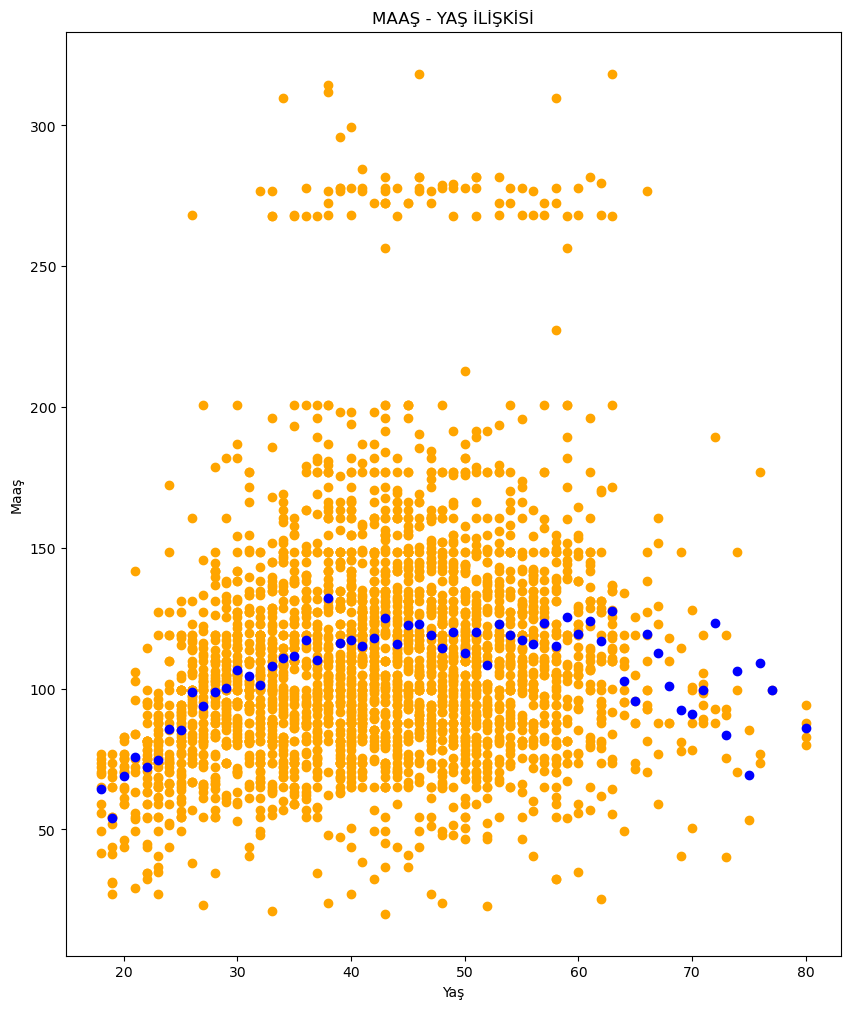

In [7]:
# Maaş - Yaş İlişkisini İnceleyelim

# Girdi(Input/Feature) -> X
X = first_df['age']

# Çıktı(Output/Label) -> y
y = first_df['wage']

# Verinin ortalamasını hesaplayalım
# Örneğin 40 yaşına denk gelen maaş değerlerinin ortalamasını alıp "ortalama değeri"ne ait noktayı işaretleyeceğiz.
# Bütün yaşlar için bir ortalama değeri üretip ortalama değerinin bulunduğu kısmı işaretleyince bir eğri oluşacak.
# first_df içerisindeki verileri yaş üzerinden gruplandırmak için Pandas'ın "groupby()" metodunu kullanacağız.
# Ardından mean() fonksiyonu ile o yaş grubundaki her maaşı toplayıp ortalama değeri elde edeceğiz.
y_mean = first_df.groupby("age").mean()


# Grafiği daha hazır hale getirelim
# Subplots geriye bir figür ve grafiğin kendisini döndürür
fig, ax = plt.subplots(figsize=(10, 12))

# Data'yı çiz
ax.scatter(X, y, c="orange")

# Ortalama eğirisini çiz
# y_mean.index : yaşlar, aslında X ile aynı.
ax.scatter(y_mean.index, y_mean, c="blue")

# Grafiği formatla
plt.title("MAAŞ - YAŞ İLİŞKİSİ")
plt.xlabel("Yaş")
plt.ylabel("Maaş")

plt.show()


**Grafikten de anlaşılacağı üzere yaş arttıkça maaş da artıyor ancak ilerleyen yaşlara doğru düşüşe geçiyor.**

In [8]:
# Yukarda hesapladığımız yaşlara göre maaş ortalamasını anlayabilmek için y_mean değişkenini inceleyelim
y_mean

,wage
age,
18,64.493063
19,53.990486
20,69.033341
21,75.906952
22,72.251667
...,...
74,106.192881
75,69.389644
76,109.219665


In [9]:
type(y_mean)

pandas.core.frame.DataFrame

In [10]:
# Görüldüğü üzere index sütununda yaşlar bulunuyor.
y_mean.index

Int64Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 80],
           dtype='int64', name='age')

In [11]:
# wage_df dataframe'ine ait "year" ve "wage" sütunlarından oluşan second_df isminde bir dataframe yaratalım.
second_df = wage_df[['year', 'wage']]

In [12]:
second_df

,year,wage
0,2006,75.043154
1,2004,70.476020
2,2003,130.982177
3,2003,154.685293
4,2005,75.043154
...,...,...
2995,2008,154.685293
2996,2007,99.689464
2997,2005,66.229408
2998,2005,87.981033


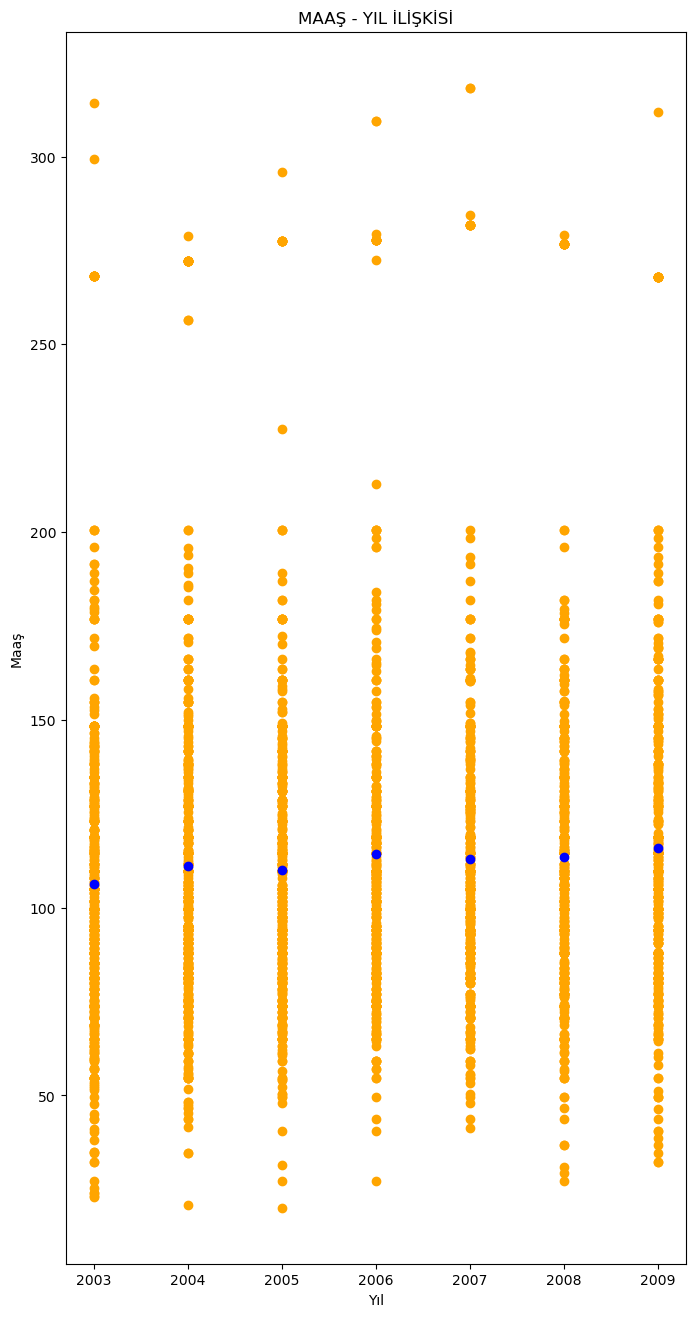

In [13]:
# Maaş - Yıl İlişkisini İnceleyelim

# Girdi(Input/Feature) -> X
X = second_df['year']

# Çıktı(Output/Label) -> y
y = second_df['wage']

# Verinin ortalamasını hesaplayalım
# Örneğin 2006 yılına denk gelen maaş değerlerinin ortalamasını alıp ortalama noktasını işaretleyeceğiz.
# Bütün yıllar için bir ortalama değeri üretip ortalama değerinin bulunduğu kısmı işaretleyince bir eğri oluşacak.
# second_df içerisindeki verileri yıl üzerinden gruplandırmak için Pandas'ın "groupby()" metodunu kullanacağız.
# Ardından mean() fonksiyonu ile o yıl grubundaki her maaş değerini toplayıp ortalama değeri elde edeceğiz.
y_mean = second_df.groupby("year").mean()


# Grafiği daha hazır hale getirelim
# Subplots geriye bir figür ve grafiğin kendisini döndürür
fig, ax = plt.subplots(figsize=(8, 16))

# Data'yı çiz
ax.scatter(X, y, c="orange")

# Ortalama eğirisini çiz
ax.scatter(y_mean.index, y_mean, c="blue")

# Grafiği formatla
plt.title("MAAŞ - YIL İLİŞKİSİ")
plt.xlabel("Yıl")
plt.ylabel("Maaş")

plt.show()


**Maaş - Yıl arasındaki ilişkiyi incelediğimizde birbirleri arasında belirgin bir korelasyon olmadığını gözlemliyoruz. Dolayısıyla yorumlayabileceğimiz elle tutulur bir sonuca erişemedik.**

In [14]:
# Yukarda hesapladığımız yıllara göre maaş ortalamasını anlayabilmek için y_mean değişkenini inceleyelim
y_mean

,wage
year,
2003,106.198284
2004,111.159997
2005,110.037857
2006,114.242579
2007,112.894556
2008,113.551999
2009,115.971771


In [15]:
type(y_mean)

pandas.core.frame.DataFrame

In [16]:
# Görüldüğü üzere index sütununda yıllar bulunuyor.
y_mean.index

Int64Index([2003, 2004, 2005, 2006, 2007, 2008, 2009], dtype='int64', name='year')

In [17]:
# wage_df dataframe'ine ait "education" ve "wage" sütunlarından oluşan third_df isminde bir dataframe yaratalım.
thirdDf = wage_df[["education", "wage"]]

In [18]:
thirdDf

,education,wage
0,1. < HS Grad,75.043154
1,4. College Grad,70.476020
2,3. Some College,130.982177
3,4. College Grad,154.685293
4,2. HS Grad,75.043154
...,...,...
2995,3. Some College,154.685293
2996,2. HS Grad,99.689464
2997,1. < HS Grad,66.229408
2998,3. Some College,87.981033


<AxesSubplot:>

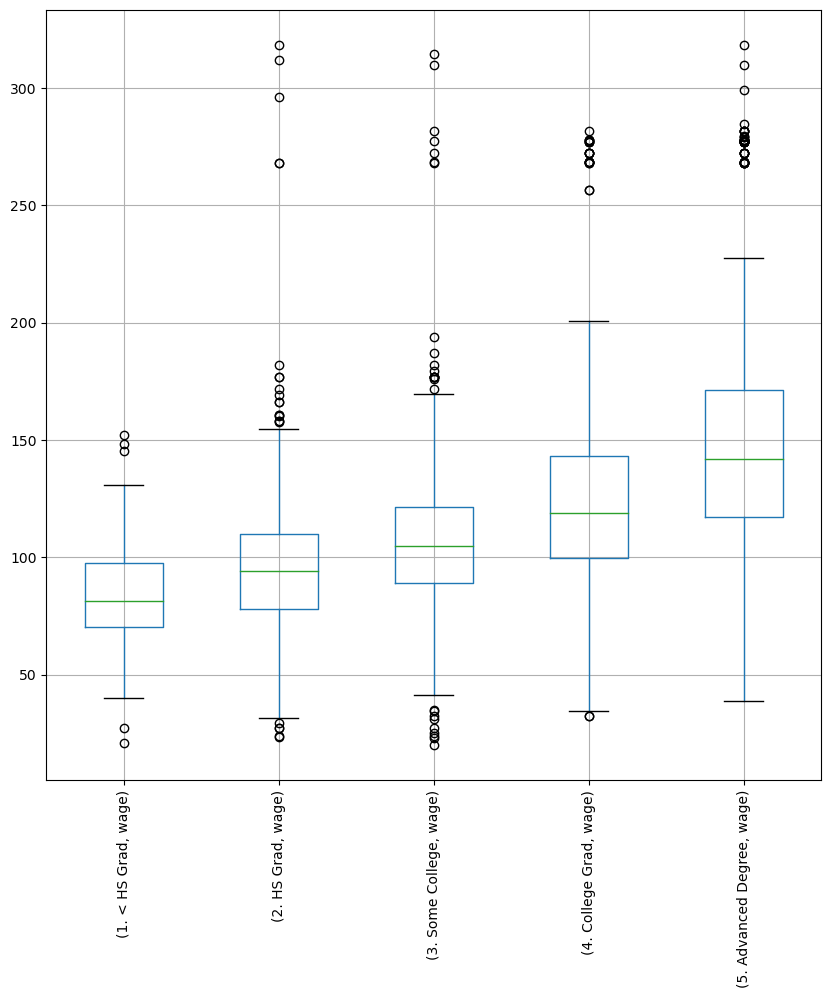

In [19]:
# Maaş - Eğitim Düzeyi İlişkisini İnceleyelim

# Girdi(Input/Feature) -> X
X = thirdDf["education"]

# Çıktı(Output/Label) -> y
y = thirdDf['wage']

# Veriyi gruplandıralım
y_grouped = thirdDf.groupby("education")

# Boxplot grafiği ile veriyi görselleştirelim.
y_grouped.boxplot(subplots=False, figsize=(10,10), rot=90)

**Görüldüğü üzere Eğitim Düzeyi - Maaş arasında pozitif korelasyon var.**

In [20]:
y_grouped.head()

,education,wage
0,1. < HS Grad,75.043154
1,4. College Grad,70.476020
2,3. Some College,130.982177
3,4. College Grad,154.685293
4,2. HS Grad,75.043154
5,4. College Grad,127.115744
6,3. Some College,169.528538
7,3. Some College,111.720849
8,3. Some College,118.884359
9,2. HS Grad,128.680488


***
### ÖRNEK

**Hisse Senedi Piyasası**

Maaş Verilerinde sürekli/sayısal olan bir değişkeni tahmin etmeye çalıştık. Fakat çoğu zaman sayısal olmayan, kategorik veriler üzerinde çalışırız. Bu örneğimizde, Standard & Poor's 500 (S&P) indexinin 5 yıllık verisi üzerinde çalışacağız. Amacımız, herhangi bir gün için index aşağı mı inecek, yoksa yukarı mı çıkacak bunu tahminlemek. Dolayısı ile amacımız, sayısal bir sonuç bulmak değil, aşağı-yukarı şeklindeki iki kategoriden birini bulmak.

**NOT:** `Maaş Verisi` örneğimiz aslında bir Regresyon Analizi, `Hisse Senedi Piyasası` örneği ise bir Sınıflandırma (Classification).

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
smarket_df = pd.read_csv('../dataset/Smarket.csv')

In [23]:
smarket_df.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [24]:
smarket_df.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [25]:
fourth_df = smarket_df[['Today', 'Direction']]

In [26]:
fourth_df

,Today,Direction
0,0.959,Up
1,1.032,Up
2,-0.623,Down
3,0.614,Up
4,0.213,Up
...,...,...
1245,0.043,Up
1246,-0.955,Down
1247,0.130,Up
1248,-0.298,Down


C:\Users\halim\AppData\Local\Temp\ipykernel_1760\1147534514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_df['Today'] = fourth_df['Today'].abs()


<AxesSubplot:>

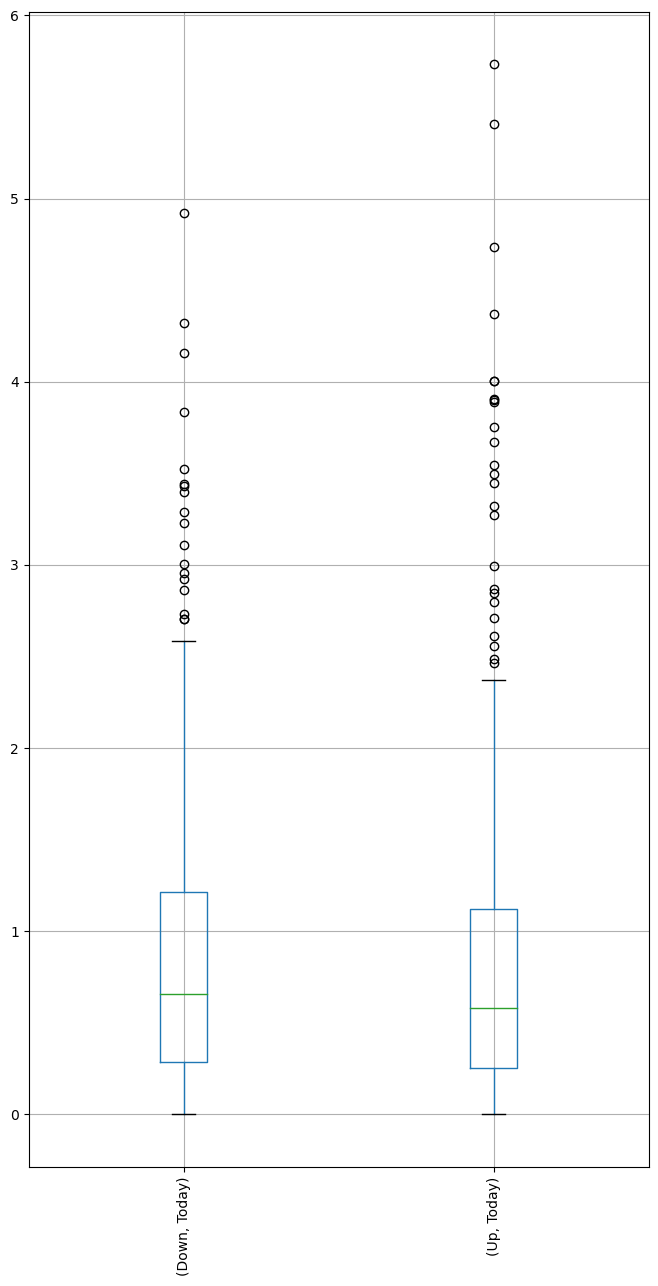

In [27]:
# BUGÜNKÜ FİYAT - ÖNCEKİ GÜN FİYATI İLİŞKİSİ

# Negatif değerleri yönetelim.
# Direction feature'u bize fiyatın arttığını ya da azladığını zaten belirtiyor.
# Bu nedenle negatif değeleri pozitife dönüştürelim.
fourth_df['Today'] = fourth_df['Today'].abs()


# Girdi(Input/Feature) -> X
X = fourth_df['Today']

# Çıktı(Output/Label) -> y
y = fourth_df['Direction']

# boxplot
y_grouped = fourth_df.groupby('Direction')

y_grouped.boxplot(subplots=False, rot=90, figsize=(8,15))

In [28]:
# Kaç gün fiyat arttı kaç gün azaldı görelim
y_grouped.count()

,Today
Direction,
Down,602
Up,648


**Gördüğünüz gibi, hisse senetlerinin bugünkü fiyatının aşağı mı yoksa yukarı mı olacağına bir önceki gün fiyatı üzerinden karar veremiyoruz. Sağlıklı bir sonuç alamadık.**

**Base Rate -  Default Oran** = %50

* 1250 kayıttan 602'si bir önceki güne göre düşmüş, 648'i ise yükselmiş.

* Neredeyse yarı yarıya. Yani %50.

* Zaten olasılık da %50 dir, ya yukarı ya da aşağı inecektir.

* Hisse fiyatı tahmini için bir önceki güne bakmak yerine ileride başka teknikler uygulayacağız.

## Unsupervised Learning

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
# NCI60 : 64 kanserli hücrenin ve 6800 adet genin ve kanser türlerinin mevcut olduğu ver seti.
# Hangi genler hangi kanser türünde birbirleri ile ilişkilidir, anlamaya çalışıyoruz.
nci60_df = pd.read_csv('../dataset/NCI60.csv')

In [31]:
nci60_df.head(10)

,Unnamed: 0,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST
5,V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,...,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000,CNS
6,V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-0.290000,...,-0.220000,-0.030000,-0.495000,0.929980,0.470000,0.129990,-0.300000,0.570000,0.000000,CNS
7,V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-0.310000,...,-0.170000,-0.420000,-0.395000,-0.570020,-0.090000,-0.700010,-0.540000,-0.450000,-2.090000,BREAST
8,V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-0.280000,...,0.560000,0.410000,0.705000,-0.200019,-0.330000,-0.600010,0.830000,-0.030000,0.650000,NSCLC
9,V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,0.580000,...,-0.590000,-0.410000,-0.375000,-1.150020,-0.330000,-1.220010,-0.170000,-0.110000,-1.790000,NSCLC


In [32]:
# Girdi(Input/Feature) -> X
# Bütün genleri input olarak olacağız.
# İlk sütun Unnamed olduğu için ilk sütunu almayacağız.
X = nci60_df.iloc[:, 1:6831]

In [33]:
X

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6821,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [34]:
# X dataframe'i içerisimdeki sütunlara ait değerlerin her biri birbirine göre küçük ya da büyük.
# Bu veriyi makineye bu şekilde verirsek önem sırasını karıştırabilir.
# Bu nedenle veriyi scale ederek yeniden boyutlandırıyoruz yani hepsini aynı sıkalaya oturtuyoruz.
# scale -> yeniden boyutlandır -> aynı ölçüleri getir

sc = StandardScaler()

In [35]:
X_scaled = sc.fit_transform(X)

In [36]:
X_scaled

array([[ 0.72867057,  1.60722049,  1.32568834, ...,  0.52089301,
        -0.83636534, -1.38467476],
       [ 1.59641782,  1.7535441 ,  0.44168566, ..., -0.8236521 ,
        -0.92542475, -1.43144619],
       [ 2.19028963, -0.01621694, -0.34909222, ...,  0.00870438,
        -0.96095134, -0.09583766],
       ...,
       [ 0.52313039, -0.78801506, -0.30257053, ...,  0.36723642,
         3.38176079,  2.53525983],
       [-0.07065235,  0.22330662, -0.16300549, ..., -0.46507011,
        -0.21343532, -1.2444386 ],
       [ 0.84285956, -0.32227482,  0.09286376, ...,  0.53369773,
        -0.49820333,  0.71218974]])

In [37]:
# Principal Component Analysis
# Veri setimizdeki genlerden hangisi kanser hücresine sebep olur? Bunu bulmak için PCA kullanırız.
# PCA önemli olan 2 gen bulsun

pca = PCA(n_components=2)

In [38]:
pca_result = pca.fit_transform(X_scaled)

In [39]:
print('Eigenvalues')
pca.explained_variance_ # İstediğimiz en önemli 2 genin bilgisini aldık.

Eigenvalues


array([788.13026423, 468.7732048 ])

In [40]:
print('Variances (Percentage)')
pca.explained_variance_ratio_ * 100

Variances (Percentage)


array([11.35894186,  6.75620239])

In [41]:
principalDf = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [42]:
principalDf.head(10)

,PC1,PC2
0,-19.838170,-3.557844
1,-23.089299,-6.440644
2,-27.456129,-2.465749
3,-42.816779,9.769374
4,-55.418547,5.197178
5,-27.177999,-6.778546
6,-31.445859,-3.861672
7,-22.332369,-10.398666
8,-14.289928,-16.110910
9,-29.748251,-23.993784


In [43]:
finalDf = pd.concat([principalDf, nci60_df[['labs']]], axis=1)

In [44]:
finalDf.head(10)

,PC1,PC2,labs
0,-19.838170,-3.557844,CNS
1,-23.089299,-6.440644,CNS
2,-27.456129,-2.465749,CNS
3,-42.816779,9.769374,RENAL
4,-55.418547,5.197178,BREAST
5,-27.177999,-6.778546,CNS
6,-31.445859,-3.861672,CNS
7,-22.332369,-10.398666,BREAST
8,-14.289928,-16.110910,NSCLC
9,-29.748251,-23.993784,NSCLC


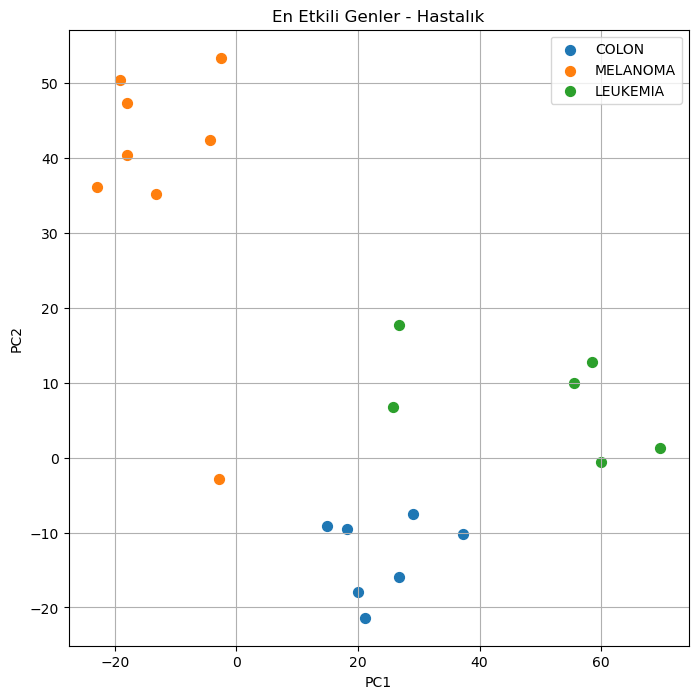

In [45]:
# Plot PCA

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('En Etkili Genler - Hastalık')

targets = ['COLON', 'MELANOMA', 'LEUKEMIA']

for target in targets:
    indexes = finalDf['labs'] == target
    ax.scatter(finalDf.loc[indexes, 'PC1'],
               finalDf.loc[indexes, 'PC2'], s = 50)

ax.legend(targets, loc='upper right')
ax.grid()